In [1]:
import pandas as pd

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt 

# Alucar - Analisando as vendas

In [2]:
alucar=pd.read_csv('dados/alucar.csv') 
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


### Time Series são coleções de dados em relação ao tempo

In [3]:
print('Quantidade de linhas e colunas:', alucar.shape)
print('Quantidade de dados nulos:', alucar.isna().sum().sum())
print('Tipos de Dados:\n', alucar.dtypes)

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0
Tipos de Dados:
 mes       object
vendas     int64
dtype: object


In [4]:
# Modificar mes para datetime
alucar['mes']= pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

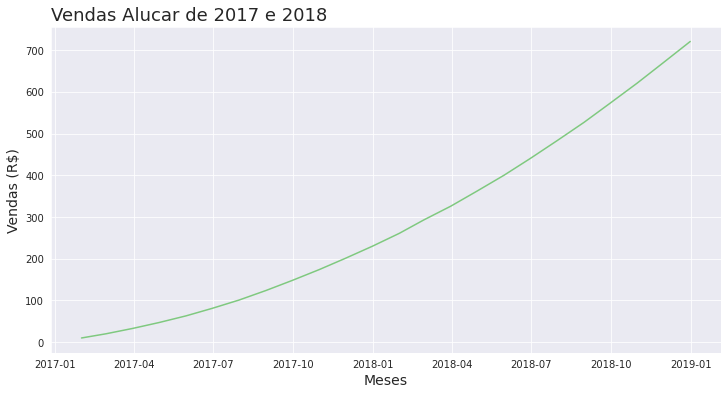

In [5]:
# STYLE GUIDE: https://urbaninstitute.github.io/graphics-styleguide/
sns.set_palette('Accent')
sns.set_style('darkgrid')
alucar_line=sns.lineplot(x='mes', y='vendas', data=alucar)
alucar_line.figure.set_size_inches(12,6)
alucar_line.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
alucar_line.set_xlabel('Meses', fontsize=14)
alucar_line.set_ylabel('Vendas (R$)', fontsize=14)
alucar_line=alucar_line

In [6]:
alucar['aumento'] = alucar['vendas'].diff() # A diferença em relação a linha anterior
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


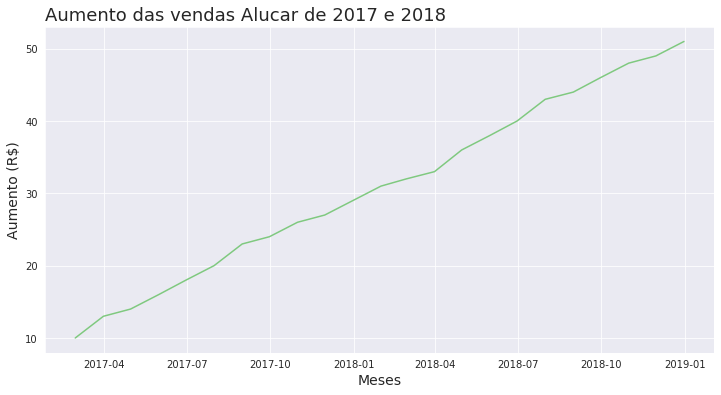

In [7]:
# STYLE GUIDE: https://urbaninstitute.github.io/graphics-styleguide/
sns.set_palette('Accent')
sns.set_style('darkgrid')
alucar_line=sns.lineplot(x='mes', y='aumento', data=alucar)
alucar_line.figure.set_size_inches(12,6)
alucar_line.set_title('Aumento das vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
alucar_line.set_xlabel('Meses', fontsize=14)
alucar_line.set_ylabel('Aumento (R$)', fontsize=14)
alucar_line=alucar_line

In [8]:
def plotar(titulo, labelx, labely, x, y, dataset):
    # STYLE GUIDE: https://urbaninstitute.github.io/graphics-styleguide/
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    alucar_line=sns.lineplot(x=x, y=y, data=dataset)
    alucar_line.figure.set_size_inches(12,6)
    alucar_line.set_title(titulo, loc='left', fontsize=18)
    alucar_line.set_xlabel(labelx, fontsize=14)
    alucar_line.set_ylabel(labely, fontsize=14)
    alucar_line=alucar_line


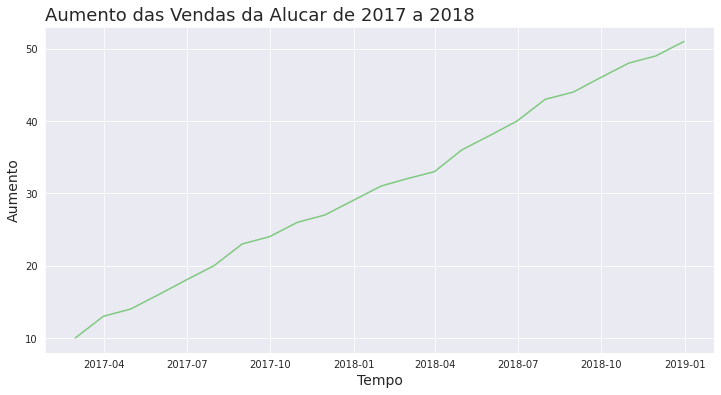

In [9]:
plotar('Aumento das Vendas da Alucar de 2017 a 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

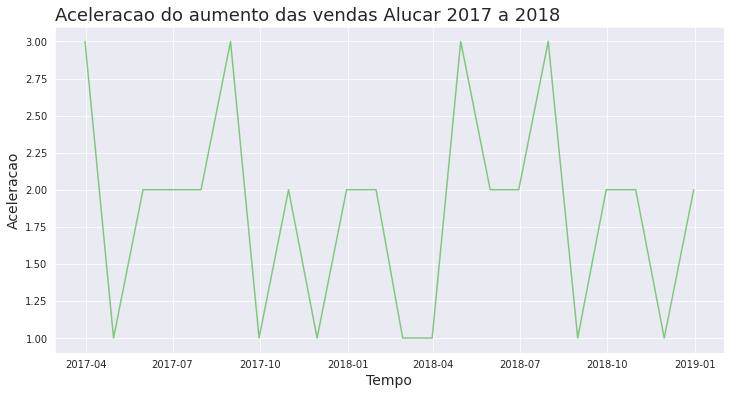

In [10]:
alucar['aceleracao']= alucar['aumento'].diff()
alucar.head()
plotar('Aceleracao do aumento das vendas Alucar 2017 a 2018', 'Tempo', 'Aceleracao', 'mes', 'aceleracao', alucar)

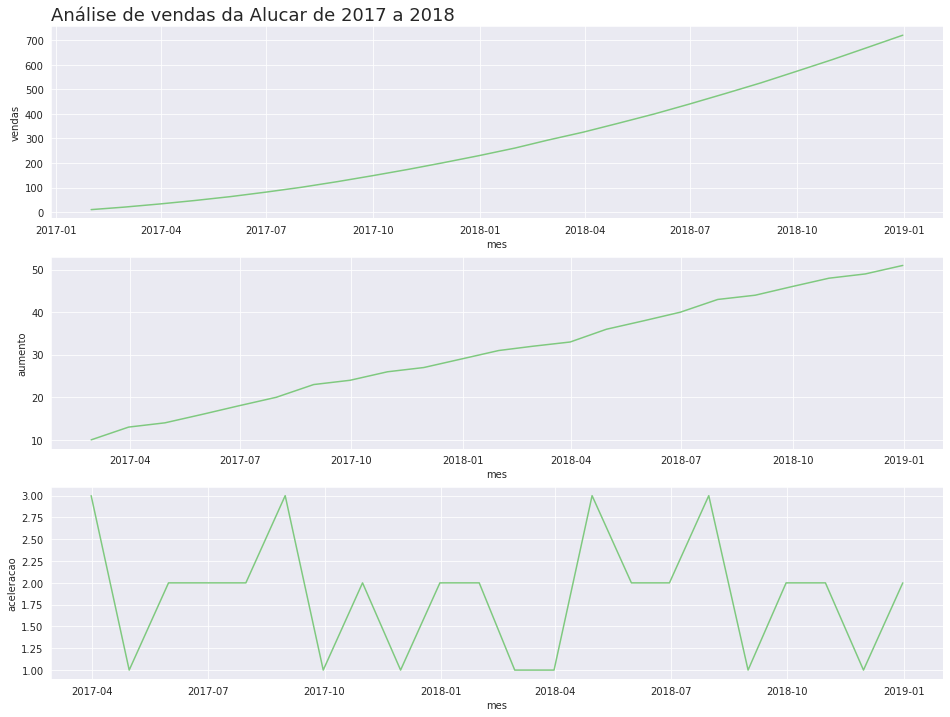

In [11]:
plt.figure(figsize=(16,12))
figura= plt.subplot(3,1,1)
figura.set_title('Análise de vendas da Alucar de 2017 a 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
figura=figura

In [70]:
def plot_comparacao(title:str, x, y:list, dataset):
    plt.figure(figsize=(16,12))
    figura= plt.subplot(3,1,1)
    figura.set_title(title, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y[0], data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y[1], data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y[2], data=dataset)
    figura=figura

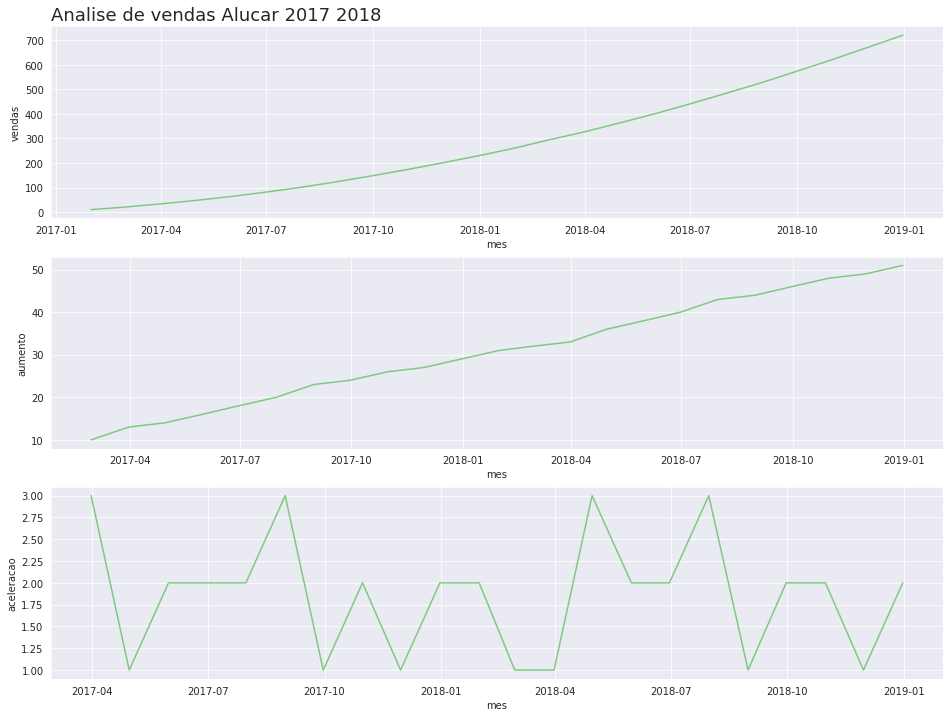

In [13]:
plot_comparacao(title='Analise de vendas Alucar 2017 2018', x='mes', y=['vendas','aumento','aceleracao'], dataset=alucar)

In [14]:
# FUNÇÃO DE AUTOCORRELAÇÃO
# LAG = Passos de correlação
# Nivel de correlações (max= 1, min=-1)

In [15]:
from pandas.plotting import autocorrelation_plot

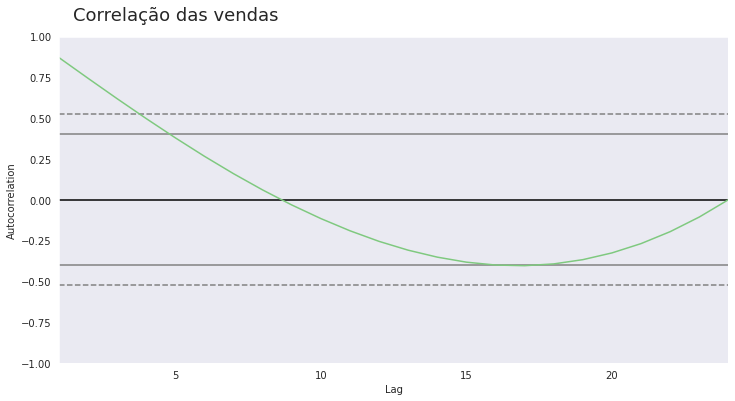

In [16]:
ax= plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=.26, y=.95)
autocorrelation_plot(alucar['vendas'])
ax=ax

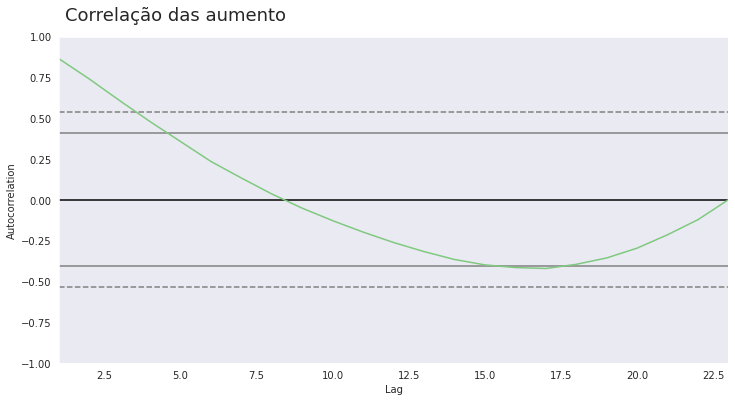

In [17]:
ax= plt.figure(figsize=(12,6))
ax.suptitle('Correlação das aumento', fontsize=18, x=.26, y=.95)
autocorrelation_plot(alucar['aumento'][1:])
ax=ax

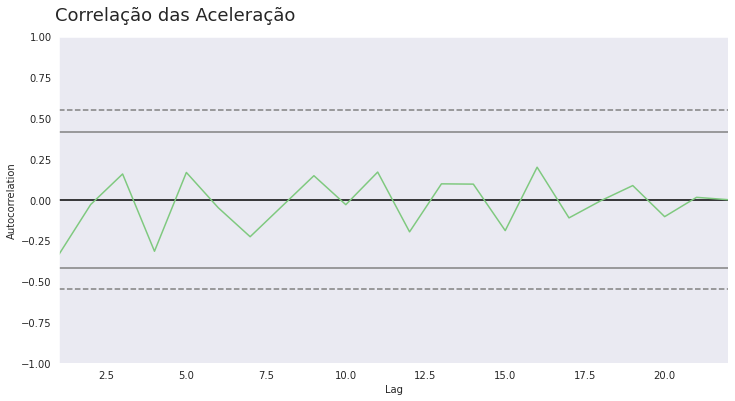

In [18]:
ax= plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Aceleração', fontsize=18, x=.26, y=.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax=ax

In [19]:
"""
 ______________________________________________
| Autocorrelação | Interpretação               |
|_____________________________________________ |
|1              | correlação perfeita positiva |
|0,7 a 0,9      | correlação forte             |
|0,4 a 0,7      | correlação moderada          |
|0,2 a 0,4      | correlação fraca             |
|0              | correlação nula              |
|< 0            | correlação negativa          |
|-1             | correlação perfeita negativa |
|______________________________________________|
"""

print()

# Alucar - Analisando assinantes da newsletter

In [20]:
assinantes= pd.read_csv('dados/newsletter_alucar.csv')

In [21]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [22]:
print('Quantidade de linhas e colunas: ', assinantes.shape)
print('Quantidades de dados nulos: ', assinantes.isna().sum().sum())
assinantes['mes']= pd.to_datetime(assinantes['mes'])
assinantes.dtypes

Quantidade de linhas e colunas:  (24, 2)
Quantidades de dados nulos:  0


mes           datetime64[ns]
assinantes             int64
dtype: object

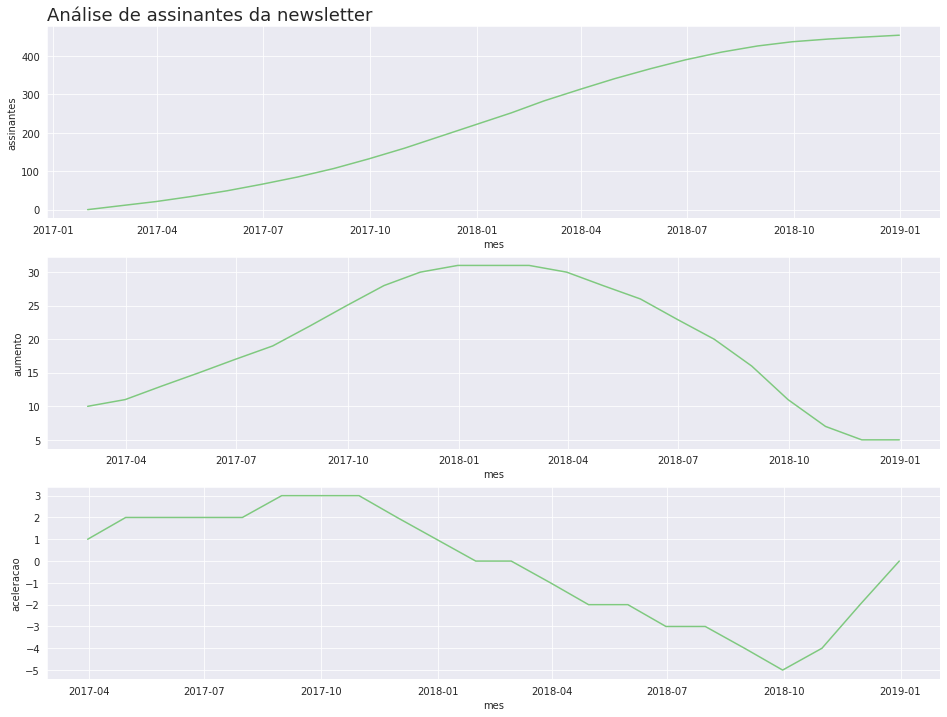

In [23]:
assinantes['aumento']= assinantes['assinantes'].diff()
assinantes['aceleracao']= assinantes['aumento'].diff()
assinantes.head()
plot_comparacao(title='Análise de assinantes da newsletter', x='mes', y=['assinantes','aumento', 'aceleracao'], dataset=assinantes)

# Chocolura - Analisando as vendas

In [24]:
chocolura= pd.read_csv('dados/chocolura.csv')

In [25]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [26]:
chocolura['mes']= pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [27]:
print('Quantidade de linhas:', chocolura.shape)
print('Quantidade de dados nulos: ', chocolura.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de dados nulos:  0


In [28]:
chocolura['aumento']= chocolura['vendas'].diff()
chocolura['aceleracao']= chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


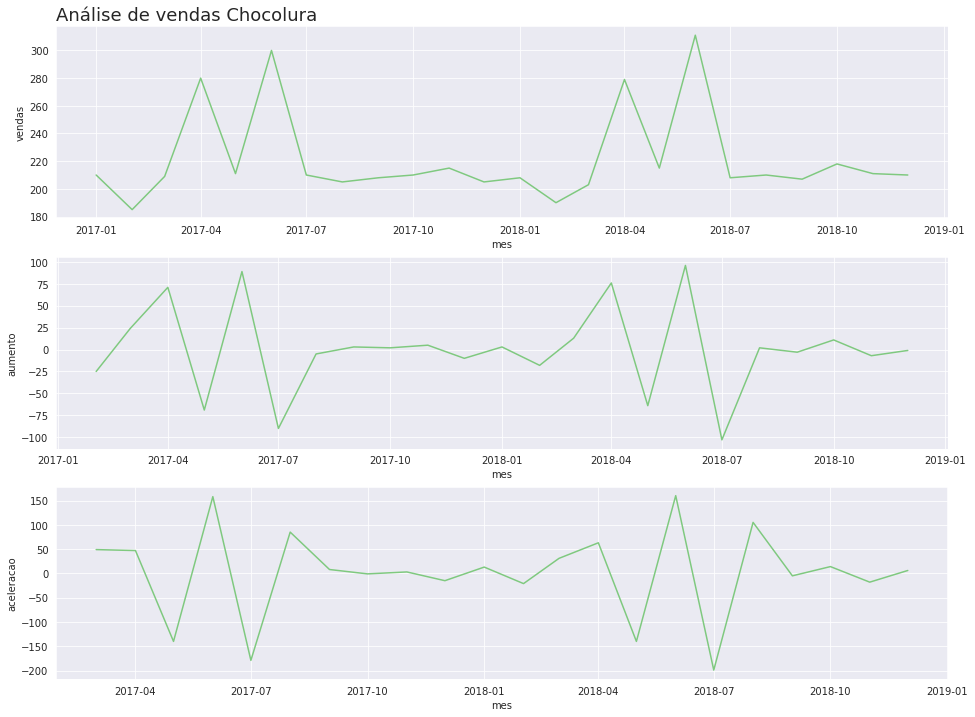

In [29]:
plot_comparacao('Análise de vendas Chocolura', 'mes', ['vendas','aumento','aceleracao'], chocolura)

In [30]:
# Sazonalidades => 21 de abril tem páscoa!
# Sazonalidades => 12 de junho tem dia dos namorados!

#  Chocolura 0 - Vendas diárias (Outubro e Novembro)

In [31]:
vendas_por_dia= pd.read_csv('dados/vendas_por_dia.csv')

In [32]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [33]:
print('Quantidade de linhas e colunas: ', vendas_por_dia.shape)
print('Quantidade de dados nulos', vendas_por_dia.isna().sum().sum())
#convertendo pra datetipe
vendas_por_dia['dia']= pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos 0


dia       datetime64[ns]
vendas             int64
dtype: object

In [34]:
vendas_por_dia['aumento']= vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao']= vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


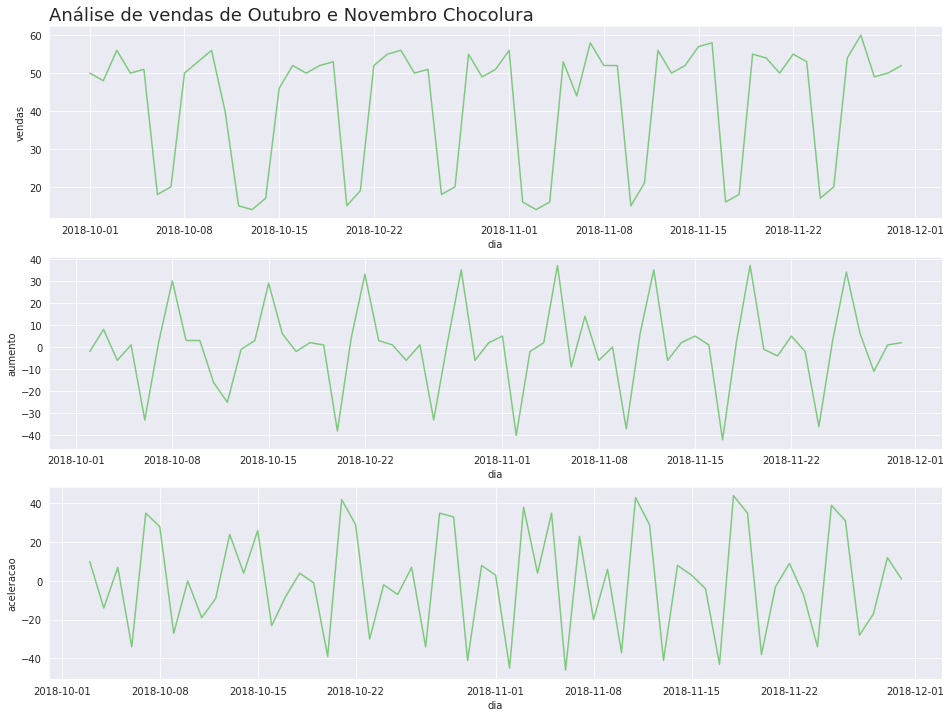

In [35]:
plot_comparacao(title='Análise de vendas de Outubro e Novembro Chocolura', x='dia', y=['vendas','aumento','aceleracao'], dataset=vendas_por_dia)

**Analisando a sazonalidade**

In [36]:
vendas_por_dia['dia_da_semana']= vendas_por_dia['dia'].dt.day_name()

In [37]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [38]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [39]:
dias={
    'Monday':'Segunda',
    'Tuesday': 'Terca',
    'Wednesday': 'Quarta',
    'Thursday':'Quinta',
    'Friday': 'Sexta',
    'Saturday':'Sabado',
    'Sunday':'Domingo'
}
vendas_por_dia['dia_da_semana']= vendas_por_dia['dia_da_semana'].map(dias)

In [40]:
vendas_por_dia.head() 

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [41]:
vendas_agrupadas= vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()

/home/marnie/anaconda3/envs/alura_pandas/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [42]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


**Correlação das vendas diárias**

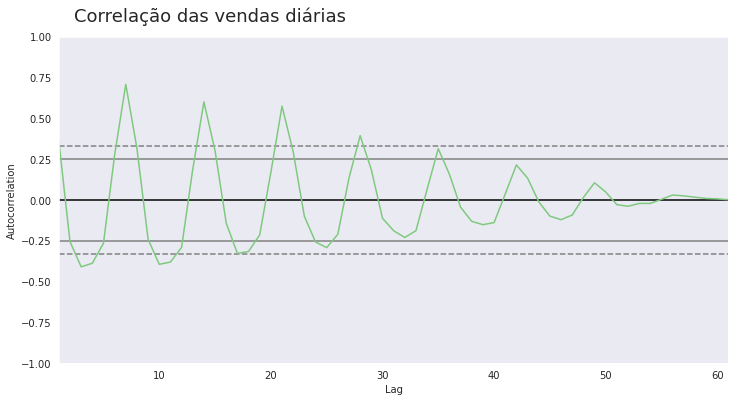

In [43]:
figure= plt.figure(figsize=(12,6))
figure.suptitle('Correlação das vendas diárias', fontsize=18, x=.3, y=.95)
autocorrelation_plot(vendas_por_dia['vendas'])
figure=figure

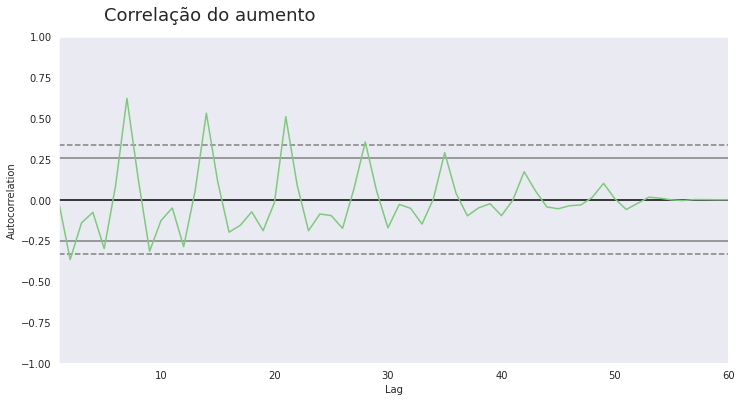

In [44]:
figure= plt.figure(figsize=(12,6))
figure.suptitle('Correlação do aumento', fontsize=18, x=.3, y=.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
figure=figure

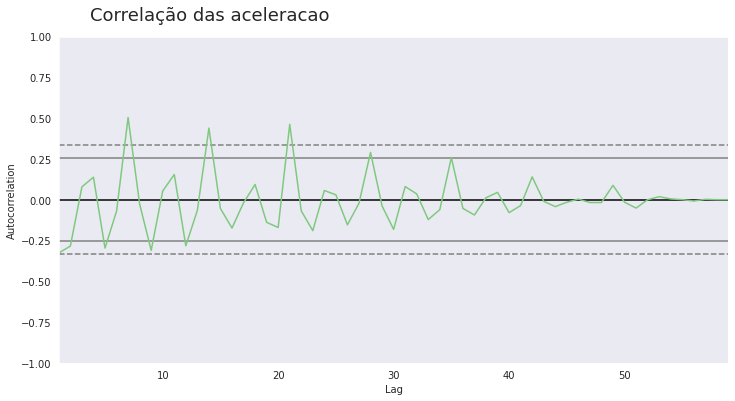

In [45]:
figure= plt.figure(figsize=(12,6))
figure.suptitle('Correlação das aceleracao', fontsize=18, x=.3, y=.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
figure=figure

# Cafelura - Análise de Vendas

In [46]:
cafelura= pd.read_csv('dados/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [47]:
print('Quantidade de linhas e colunas: ', cafelura.shape)
print('Quantidade de valores nulos: ', cafelura.isna().sum().sum())

#Modificando o valor de datas
cafelura['mes']= pd.to_datetime(cafelura['mes'])
cafelura.dtypes

Quantidade de linhas e colunas:  (24, 2)
Quantidade de valores nulos:  0


mes       datetime64[ns]
vendas             int64
dtype: object

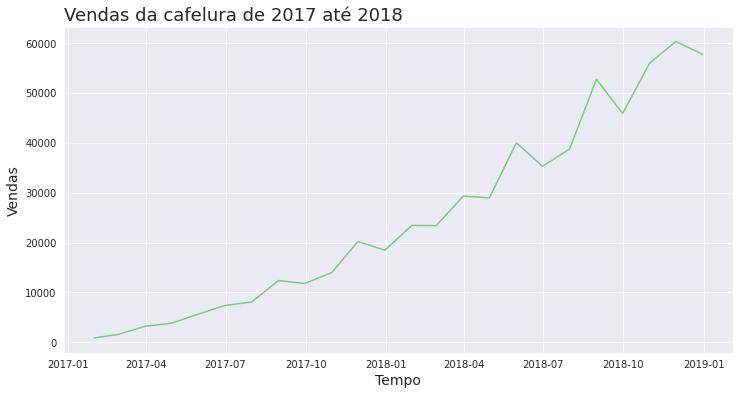

In [48]:
plotar('Vendas da cafelura de 2017 até 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [49]:
fds= pd.read_csv('dados/dias_final_de_semana.csv')
fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [50]:
fds['quantidade_de_dias'].values
cafelura['vendas_normalizadas']= cafelura['vendas']/fds['quantidade_de_dias']

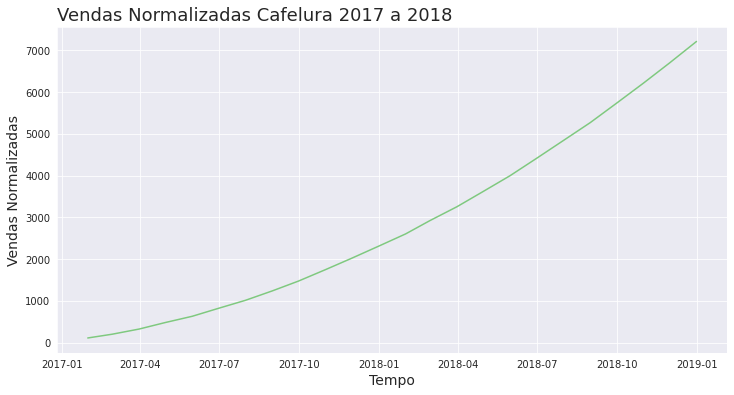

In [51]:
plotar('Vendas Normalizadas Cafelura 2017 a 2018', 'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

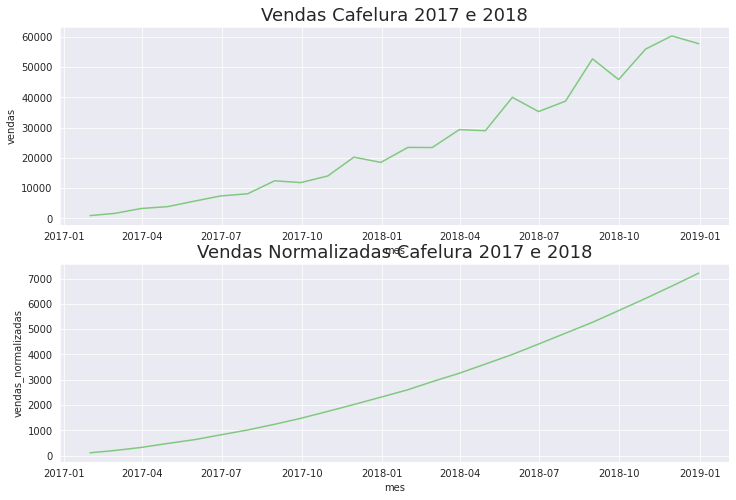

In [52]:
plt.figure(figsize=(12,8))
ax= plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax

# Statsmodes

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

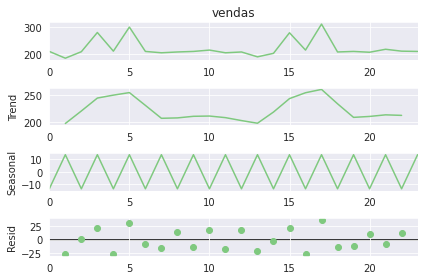

In [61]:
resultado= seasonal_decompose(chocolura['vendas'], period=2)
ax= resultado.plot()

# Componentes importantes na Time Series:
 - **Tendência**
 - **Sazonalidade**
 - **Ruídos** 


In [63]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [66]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido,
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,-13.386364,NaN
1,185.0,197.25,13.386364,-25.636364
2,209.0,220.75,-13.386364,1.636364
3,280.0,245.00,13.386364,21.613636
4,211.0,250.50,-13.386364,-26.113636


In [75]:
plot_comparacao(title='Observação, tendência, sazonalidade e ruido', x=int(resultado.index) y=['observacao','tendencia','sazonalidade'] dataset=resultado)

SyntaxError: invalid syntax (<ipython-input-75-03389584b692>, line 1)

# E para arrumar dados faltantes do DF?
    - Preenchendo os dados nulos com o valor médio da coluna
    - Preenchendo os dados nulos com um valor específico
    - Deletando os dados nulos do DataFrame
    - Preenchendo um dado nulo com o valor anterior ou posterior
    - Interpolando dados nulos com a média

# Análise Alucel

In [77]:
alucel = pd.read_csv('dados/alucel.csv')

In [83]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [85]:
print('Quantidade de linhas e colunas: ', alucel.shape)
print('Quantidade de dados nulos: ', alucel.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


In [87]:
alucel['aumento'] = alucel.vendas.diff()
alucel['aceleracao'] = alucel.aumento.diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


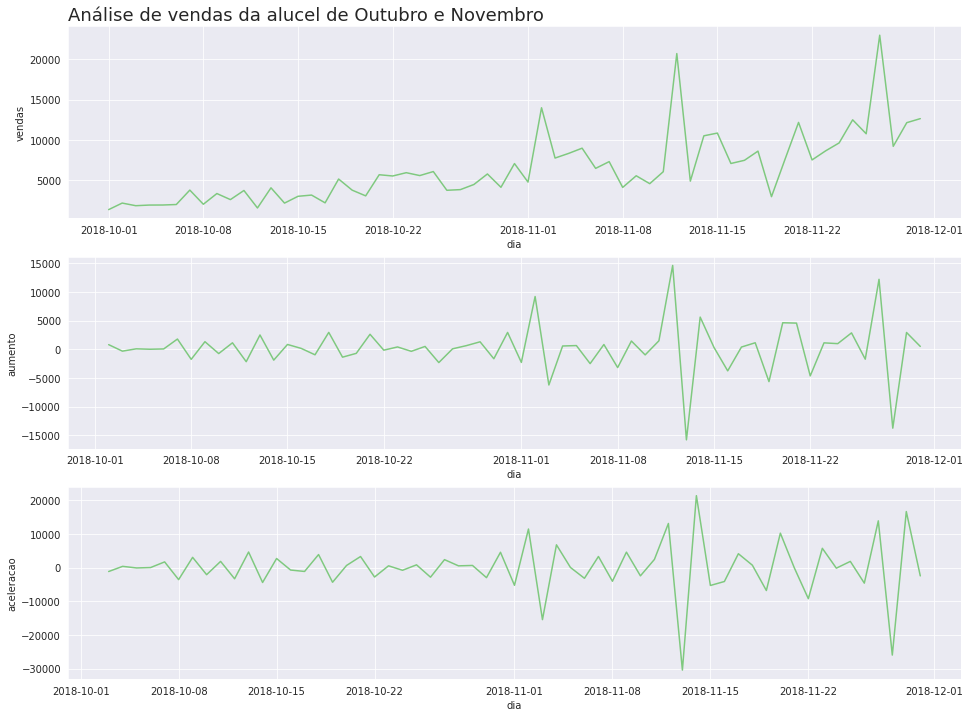

In [88]:
plot_comparacao(title='Análise de vendas da alucel de Outubro e Novembro', x='dia', y=['vendas', 'aumento', 'aceleracao'], dataset=alucel)

## Técnica de Média Móvel
### Tenta minimizar o ruido de uma time series por meio da média móvel


In [110]:
alucel['media_movel']=alucel['vendas'].rolling(7).mean()
alucel['media_movel_21']=alucel['vendas'].rolling(21).mean()

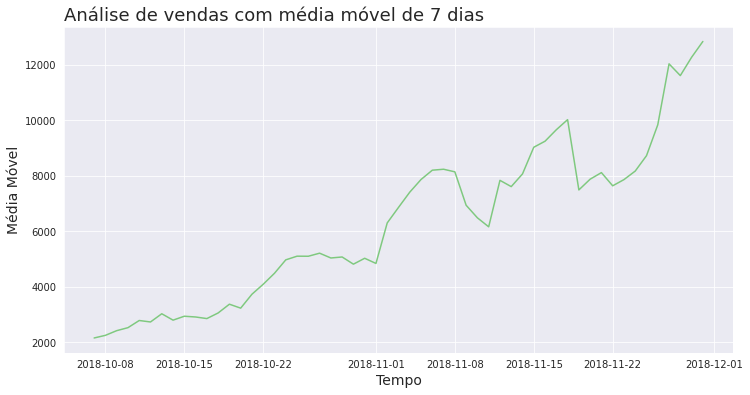

In [111]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

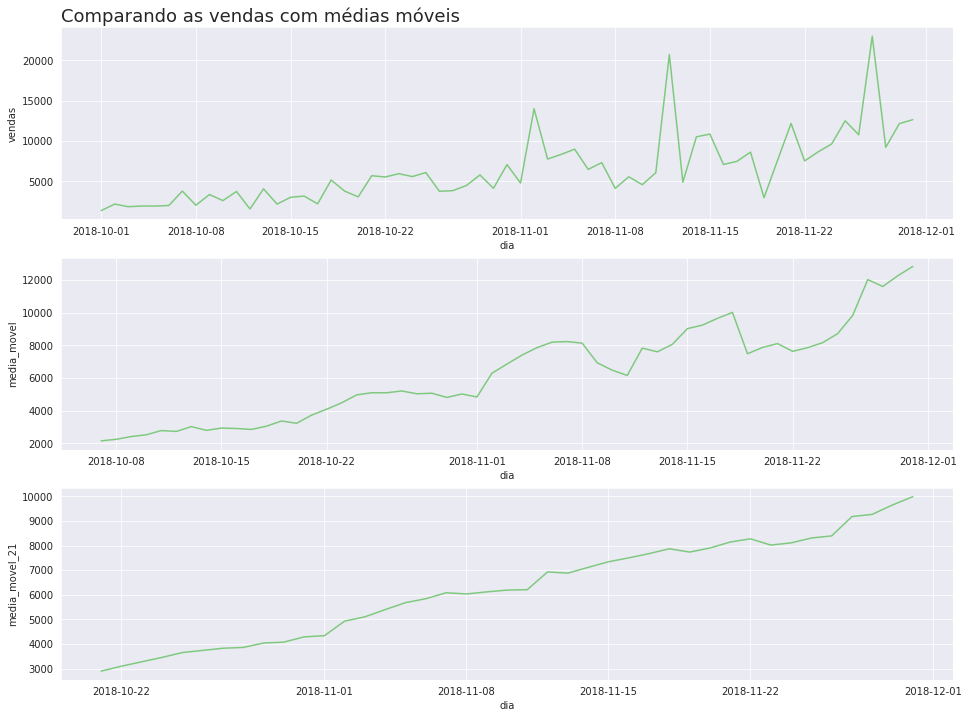

In [115]:
plot_comparacao(title="Comparando as vendas com médias móveis",x='dia', y=['vendas', 'media_movel', 'media_movel_21'], dataset=alucel)